In [1]:
import time
import simpy
def example(env):
    start = time.perf_counter()
    yield env.timeout(1)
    end = time.perf_counter()
    print('Duration of one simulation time unit: %.2fs' % (end - start))

    
env = simpy.Environment()
proc = env.process(example(env))
env.run(until=proc)
    
     


Duration of one simulation time unit: 0.00s


In [5]:
import simpy
def main():
    env = simpy.Environment()
    env.process(traffic_light(env))
    env.run(until = 1200)
    print("Simulation complete")
    
def traffic_light(env):
    while True:
        print("Light turned green at t = ",str(env.now))
        yield env.timeout(30)
        print("Light turned yellow at t = ",str(env.now))
        yield env.timeout(5)
        print("Light turned red at t = ",str(env.now))
        yield env.timeout(20)
        
if __name__ == "__main__":
    main()

Light turned green at t =  0
Light turned yellow at t =  30
Light turned red at t =  35
Light turned green at t =  55
Light turned yellow at t =  85
Light turned red at t =  90
Light turned green at t =  110
Light turned yellow at t =  140
Light turned red at t =  145
Light turned green at t =  165
Light turned yellow at t =  195
Light turned red at t =  200
Light turned green at t =  220
Light turned yellow at t =  250
Light turned red at t =  255
Light turned green at t =  275
Light turned yellow at t =  305
Light turned red at t =  310
Light turned green at t =  330
Light turned yellow at t =  360
Light turned red at t =  365
Light turned green at t =  385
Light turned yellow at t =  415
Light turned red at t =  420
Light turned green at t =  440
Light turned yellow at t =  470
Light turned red at t =  475
Light turned green at t =  495
Light turned yellow at t =  525
Light turned red at t =  530
Light turned green at t =  550
Light turned yellow at t =  580
Light turned red at t = 

0.26529150272103663 	 Customer 1 arrives 
0.26529150272103663 	 Customer 1 is being served
0.49609728917205387 	 Customer 1 departs
0.683935090376316 	 Customer 2 arrives 
0.683935090376316 	 Customer 2 is being served
0.8216972131501907 	 Customer 2 departs
0.9463354744820729 	 Customer 3 arrives 
0.9463354744820729 	 Customer 3 is being served
1.0902152742742328 	 Customer 3 departs
1.2923885727966093 	 Customer 4 arrives 
1.2923885727966093 	 Customer 4 is being served
2.0335633771408284 	 Customer 5 arrives 
2.121116618310063 	 Customer 4 departs
2.121116618310063 	 Customer 5 is being served
2.1947640774415795 	 Customer 6 arrives 
2.445655447287109 	 Customer 7 arrives 
2.513340653302355 	 Customer 5 departs
2.513340653302355 	 Customer 6 is being served
2.72546639620005 	 Customer 8 arrives 
2.7500281811709995 	 Customer 9 arrives 
2.780415190877333 	 Customer 10 arrives 
2.787223719772075 	 Customer 11 arrives 
3.162904191783715 	 Customer 6 departs
3.162904191783715 	 Customer

68.92575422042633 	 Customer 210 departs
68.92575422042633 	 Customer 211 is being served
69.05726191985119 	 Customer 211 departs
69.86523170864433 	 Customer 212 arrives 
69.86523170864433 	 Customer 212 is being served
69.92452396224674 	 Customer 213 arrives 
70.11978610525145 	 Customer 212 departs
70.11978610525145 	 Customer 213 is being served
70.14917177934355 	 Customer 214 arrives 
70.17168316530204 	 Customer 215 arrives 
70.68132945541714 	 Customer 216 arrives 
70.7947418592561 	 Customer 217 arrives 
70.88684359103758 	 Customer 218 arrives 
71.24891136238534 	 Customer 219 arrives 
71.25674212746318 	 Customer 213 departs
71.25674212746318 	 Customer 214 is being served
71.34306026712146 	 Customer 220 arrives 
71.53079027026934 	 Customer 214 departs
71.53079027026934 	 Customer 215 is being served
71.58585279425151 	 Customer 221 arrives 
71.6687408012778 	 Customer 215 departs
71.6687408012778 	 Customer 216 is being served
71.7533273310604 	 Customer 216 departs
71.

Text(0,0.5,'Queue length')

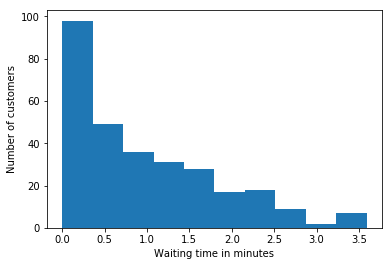

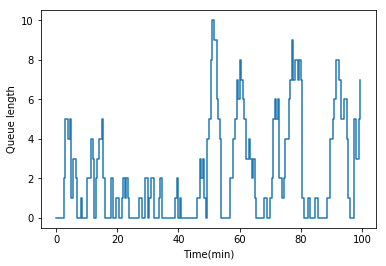

In [15]:
import simpy
import numpy as np

def generate_interarrival():
    ## three customers per minute
    return np.random.exponential(1./3.0)

def generate_service():
    return np.random.exponential(1./4.0)

def cafe_run(env, servers):
    i=0
    while True:
        i += 1
        yield env.timeout(generate_interarrival())        
        env.process(customer(env, i, servers))

wait_t = []        

def customer(env, customer, servers):
    with servers.request() as request:
        t_arrival = env.now
        print(env.now,"\t","Customer {} arrives ".format(customer))
        yield request
        print (env.now,"\t","Customer {} is being served".format(customer))
        yield env.timeout(generate_service())
        print (env.now,"\t","Customer {} departs".format(customer))
        t_depart = env.now
        wait_t.append(t_depart - t_arrival)
        
obs_times = []
q_length  = []

## function meant for keeping track of observartions
def observe(env, servers):
    while True:
        obs_times.append(env.now)
        q_length.append(len(servers.queue))
        ## We are timing out the yield by 1.0 minute before making 
        ## succesive observations
        yield env.timeout(0.5)

np.random.seed(0)
env = simpy.Environment()

servers = simpy.Resource(env, capacity=1)

env.process(cafe_run(env, servers))
env.process(observe(env, servers))
env.run(until = 100)


##print(obs_times)

import matplotlib.pyplot as plt
plt.figure()
plt.hist(wait_t)
plt.xlabel("Waiting time in minutes")
plt.ylabel("Number of customers")

plt.figure()
plt.step(obs_times, q_length, where = 'post')
plt.xlabel('Time(min)')
plt.ylabel('Queue length')



In [16]:
print(obs_times)

[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 33.0, 33.5, 34.0, 34.5, 35.0, 35.5, 36.0, 36.5, 37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0, 43.5, 44.0, 44.5, 45.0, 45.5, 46.0, 46.5, 47.0, 47.5, 48.0, 48.5, 49.0, 49.5, 50.0, 50.5, 51.0, 51.5, 52.0, 52.5, 53.0, 53.5, 54.0, 54.5, 55.0, 55.5, 56.0, 56.5, 57.0, 57.5, 58.0, 58.5, 59.0, 59.5, 60.0, 60.5, 61.0, 61.5, 62.0, 62.5, 63.0, 63.5, 64.0, 64.5, 65.0, 65.5, 66.0, 66.5, 67.0, 67.5, 68.0, 68.5, 69.0, 69.5, 70.0, 70.5, 71.0, 71.5, 72.0, 72.5, 73.0, 73.5, 74.0, 74.5, 75.0, 75.5, 76.0, 76.5, 77.0, 77.5, 78.0, 78.5, 79.0, 79.5, 80.0, 80.5, 81.0, 81.5, 82.0, 82.5, 83.0, 83.5, 84.0, 84.5, 8

In [17]:
print(q_length)

[0, 0, 0, 0, 0, 2, 5, 5, 4, 5, 1, 3, 3, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 4, 3, 0, 2, 3, 4, 4, 5, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 3, 1, 0, 4, 5, 8, 10, 9, 9, 6, 5, 4, 0, 0, 0, 0, 0, 0, 2, 2, 4, 5, 7, 6, 8, 7, 6, 5, 3, 3, 4, 3, 2, 3, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 5, 6, 5, 6, 2, 2, 1, 2, 4, 4, 6, 7, 9, 7, 8, 8, 7, 8, 7, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 4, 4, 5, 6, 8, 8, 7, 5, 5, 6, 6, 4, 1, 0, 0, 0, 5, 3, 3, 5, 7]
